<a href="https://colab.research.google.com/github/yoouza/bigcontest/blob/master/data_analysis/TimeSeries_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data_2019 = pd.read_csv('/content/2019_data.csv', encoding='utf-8', index_col=0)
data_2019.head()

,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,...,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31
숙박,1475301,1662554,1519794,1595954,1607949,1764864,1783591,1920771,2481883,2342277,2001634,1727767,1596988,1495958,1837038,2191553,2311040,1697187,1595478,1976954,1703506,1929493,2609475,2407589,1864224,1548595,1714109,1796013,2210390,2001920,1858805,1529100,1525801,1471634,1462182,2066715,2412628,2405217,1774502,1555196,...,2361161,2312974,1758130,2015809,2311540,3370319,3229344,2389222,2883402,3265157,2840390,2451140,2808183,2620643,2368720,1896648,1861829,1710021,2025912,2619001,2375313,2169651,1913836,1863930,1901731,2132419,2813070,2540190,2488443,1911437,1927931,2013568,2501561,3772612,2514747,2634966,2038949,2228258,2186711,2577217
레저용품,925726,1452418,1088861,1003768,727146,1308610,892269,851803,1287731,1232678,763947,726959,758613,775728,730670,1207343,1257525,675939,662779,721322,757920,809451,1375276,1460689,797087,924347,837871,952512,1616164,1785753,1732622,861863,731671,765580,710719,892353,1554272,1484526,720416,681212,...,904432,827090,914811,724045,841059,1773025,1600696,698446,985367,1411216,1060837,1159442,1985931,1979144,1587951,897086,866376,810231,1013610,1717293,1696887,858368,853397,818559,823732,921290,1602793,1229207,738720,806937,778543,786641,1002406,1703447,1611017,630853,885078,850541,769525,922809
레저업소,556821,453984,377059,320572,214715,309199,439243,546633,456769,374155,567428,562264,586987,492338,458900,431931,339486,536922,568011,540709,477419,491519,463353,342134,533486,613597,521236,655125,470487,454453,351873,728025,538830,454734,467091,481145,513710,391828,588641,470954,...,583508,478109,504521,465582,477783,510636,343513,662044,735041,498469,522588,471488,457179,319582,352495,561279,468051,438472,444671,401157,319641,458801,386603,460999,425397,432254,441805,329593,652354,474772,513903,461446,473637,463215,300772,441604,542027,459924,471977,555272
문화취미,221697,303195,241879,211858,197949,258490,191375,214700,259467,198545,203479,247976,191689,235372,196309,243099,208603,168691,170849,165707,199535,203267,271677,221490,153850,156355,195068,219777,328875,236626,180396,163347,132515,174620,159543,209509,306562,236388,168275,120808,...,157086,150520,235902,221678,217360,338290,277300,182659,151557,238268,202820,251713,325129,303808,303275,336553,322763,185621,200793,227520,204795,168983,217482,198782,149562,178408,254833,217545,158237,177432,146040,161490,193860,252206,224966,191136,134804,198939,234099,216266
가구,20244,64324,10250,10292,6192,21724,36505,52945,94597,105715,90802,57422,36442,50089,42125,66112,99640,60052,65160,42093,74977,29674,175455,69402,50375,21140,99807,31789,116461,56631,117457,51731,43405,64884,38441,59626,108852,61072,69345,49130,...,120736,37979,40467,23429,56095,101572,59856,29705,105240,73198,46900,79576,83285,55250,134458,71885,48554,41082,32414,93377,117521,35330,68801,51734,40071,80681,75793,55076,69781,67370,57481,48524,46615,107343,110556,36044,68302,55866,40236,24945


In [83]:
import datetime

dates = list(data_2019.keys().unique())

time_2019 = []
time_2020 = []
# # 날짜 데이터로 저장
for date in dates:
    time_2019.append(datetime.datetime.strptime(date, "%Y-%m-%d").date())

time_2019[:5]

[datetime.date(2019, 2, 1),
 datetime.date(2019, 2, 2),
 datetime.date(2019, 2, 3),
 datetime.date(2019, 2, 4),
 datetime.date(2019, 2, 5)]

In [114]:
# data = pd.DataFrame(data_2019.loc['숙박'].values.reshape(1, len(data_2019.loc['숙박'].values)), columns=time_2019)
data = data_2019.loc['숙박']
data[:5]

2019-02-01    1475301
2019-02-02    1662554
2019-02-03    1519794
2019-02-04    1595954
2019-02-05    1607949
Name: 숙박, dtype: int64

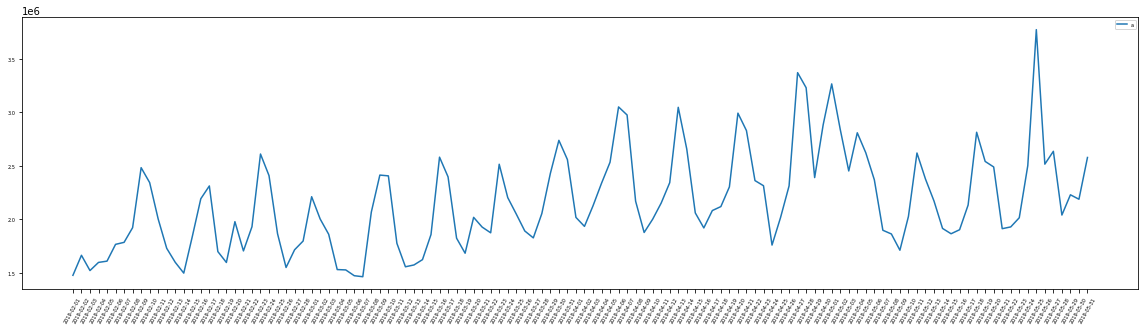

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))

sns.lineplot(data = data)
plt.legend(('accomodation'), fontsize=5)
plt.xticks(rotation = 60, fontsize = 5)
plt.tick_params(labelsize=5)
plt.show()

In [123]:
import numpy as np

# 데이터 쪼개기
x = np.array([data[i+j] for i in range(len(data)-6) for j in range(7)]).reshape(-1,7,1)
y = np.array([data[i+7] for i in range(len(data)-7)]).reshape(-1,1)
x_split = int(x.shape[0]*0.85)
y_split = int(y.shape[0]*0.85)
x_train = x[:x_split]
x_test = x[x_split:-1,:,:]
y_train = y[:y_split]
y_test = y[y_split:]

len(x_train), len(y_train)

(96, 96)

In [132]:
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

# 모델링
model = models.Sequential()
model.add(layers.LSTM(16,input_shape = (7,1), return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 7, 16)             1152      
_________________________________________________________________
lstm_25 (LSTM)               (None, 8)                 800       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [133]:
# 모델 컴파일
model.compile(optimizer='adam',loss='mse')

In [134]:
# 모델 피팅
model.fit(x_train, y_train, epochs=10)#, verbose=0)

Epoch 1/10
3/3 [==============================] - 0s 6ms/step - loss: 4875899895808.0000
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 4875899895808.0000
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 4875899371520.0000
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 4875899371520.0000
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 4875898847232.0000
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 4875898847232.0000
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 4875898847232.0000
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 4875897798656.0000
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 4875897798656.0000
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 4875897274368.0000


In [135]:
# 예측값 출력
y_hat = model.predict(x_test, batch_size=1)

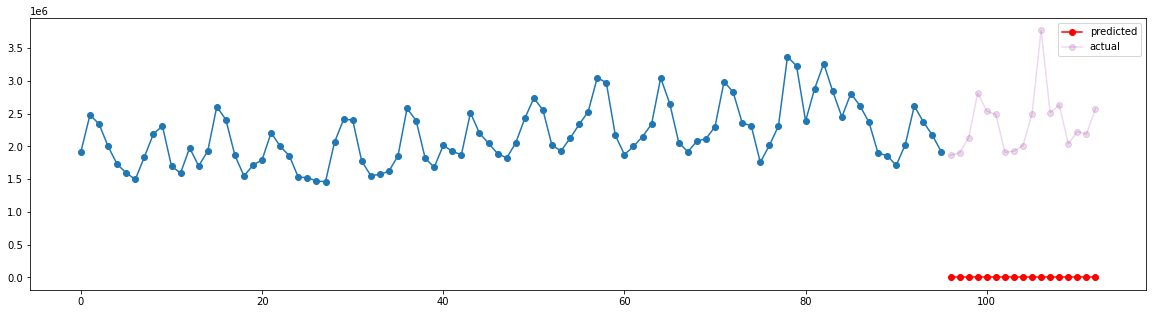

In [143]:
#예측값과 실제 값 비교
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(20, 5))
plt.plot(y_axis, y_train.reshape(96,), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(17,), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(17,), '-o', color='purple', alpha=0.15, label='actual') #y_test 실제값 그래프로 표현 

plt.legend()
plt.show()